In [35]:
import sys
!{sys.executable} -m pip install folium


Defaulting to user installation because normal site-packages is not writeable


In [36]:
import folium
folium.__version__

'0.20.0'

In [37]:
import os
os.getcwd()


'C:\\Users\\Admin'

In [44]:
# =========================================
# Task 05: Traffic Accident Analysis & Visualization
# (Jupyter Notebook Version)
# =========================================

# -------------------------
# 1. Import Libraries
# -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display

In [45]:
# Set plot style
sns.set_style("whitegrid")

# -------------------------
# 2. Define columns to load
# Adjusted for March 2023 dataset
# -------------------------
USE_COLS = [
    'ID', 'Start_Time', 'State', 'City', 'Severity',
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition',
    'Sunrise_Sunset', 'Street', 'Turning_Loop',
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
    'Traffic_Calming', 'Traffic_Signal', 'Wind_Direction',
    'Start_Lat', 'Start_Lng'   # Latitude & Longitude columns in March23 dataset
]


In [40]:
# -------------------------
# 3. Load dataset safely using chunks
# -------------------------
chunks = pd.read_csv(
    r"C:/Users/Admin/OneDrive/Task 5/US_Accidents_March23.csv",
    usecols=USE_COLS,
    chunksize=300_000
)

df = pd.concat(chunks, ignore_index=True)
print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns)

Dataset Loaded Successfully!
Shape: (7728394, 29)
Columns: Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street',
       'City', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')


In [47]:
# -------------------------
# 4. Feature Engineering
# -------------------------
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng'], inplace=True)

df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown')

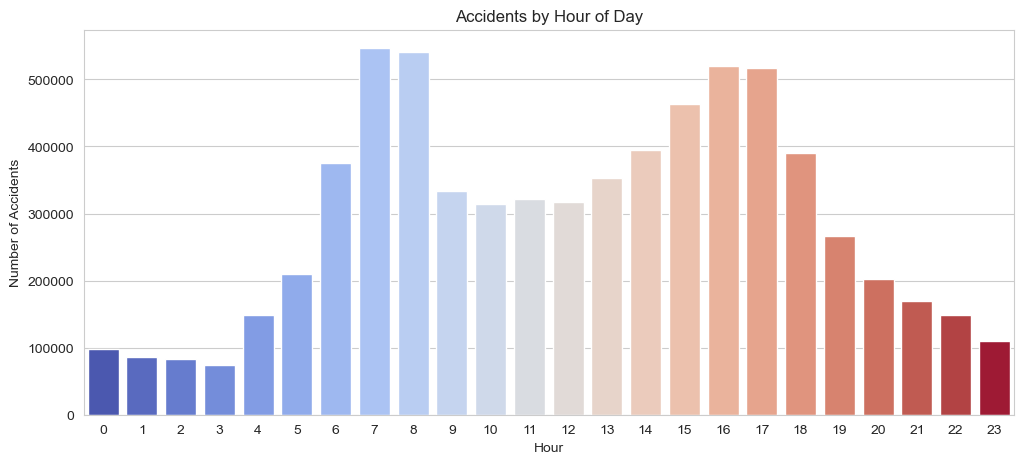

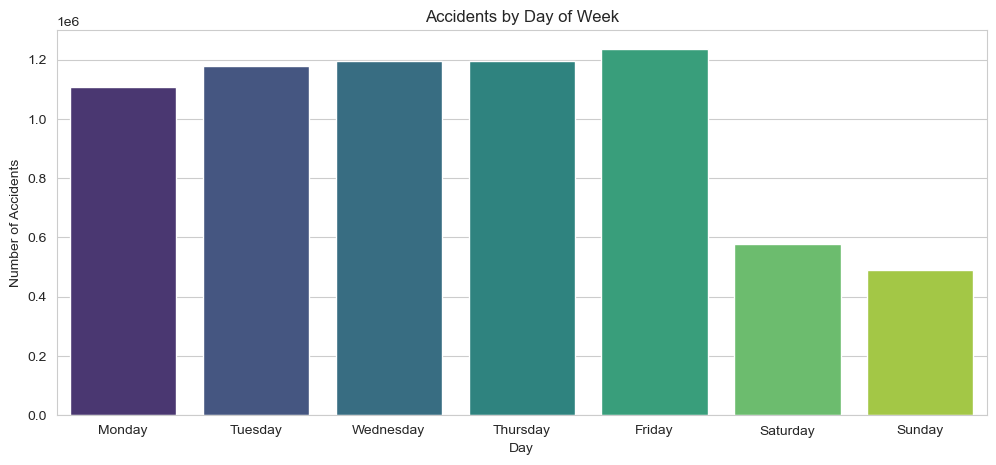

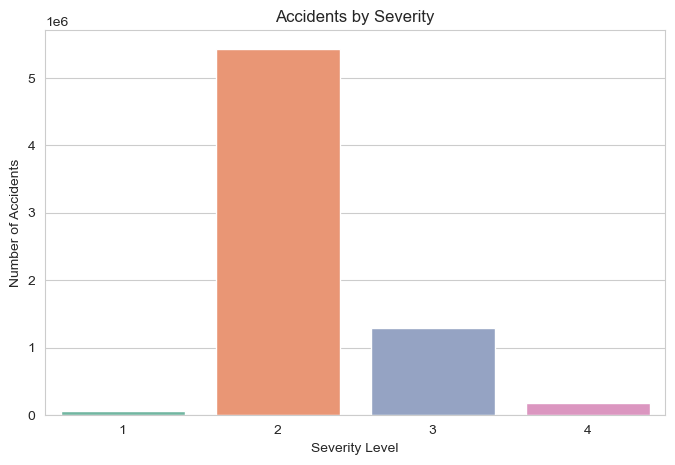

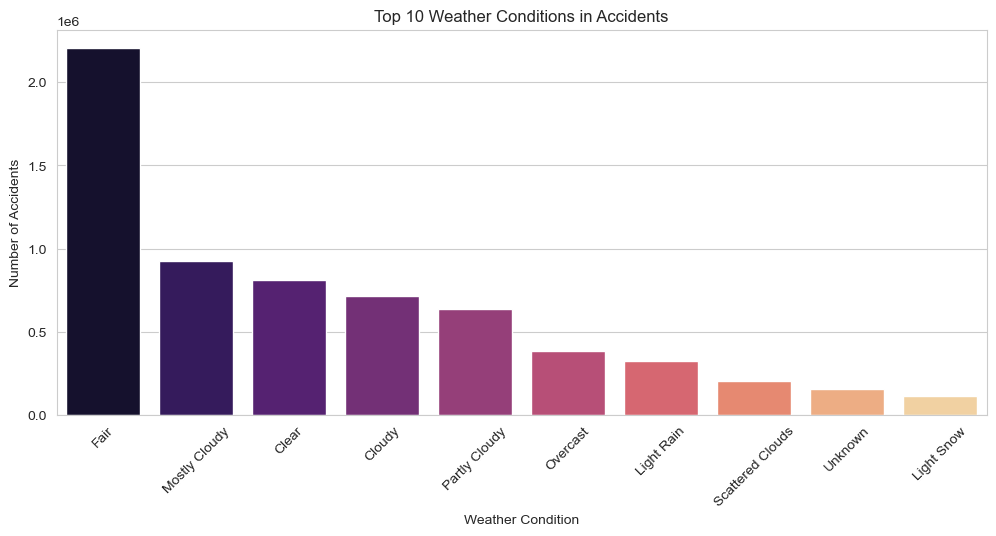

In [49]:
# -------------------------
# 5. Exploratory Data Analysis
# -------------------------

# Accidents by Hour
plt.figure(figsize=(12,5))
sns.countplot(
    x='Hour',
    data=df,
    hue='Hour',
    palette='coolwarm',
    legend=False
)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

# Accidents by Day of Week
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(12,5))
sns.countplot(
    x='DayOfWeek',
    data=df,
    order=order,
    hue='DayOfWeek',
    palette='viridis',
    legend=False
)
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.show()

# Accidents by Severity
plt.figure(figsize=(8,5))
sns.countplot(
    x='Severity',
    data=df,
    hue='Severity',
    palette='Set2',
    legend=False
)
plt.title("Accidents by Severity")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

# Top 10 Weather Conditions
top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(
    x=top_weather.index,
    y=top_weather.values,
    hue=top_weather.index,
    palette='magma',
    legend=False
)
plt.xticks(rotation=45)
plt.title("Top 10 Weather Conditions in Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()


Interactive heatmap saved as 'accident_hotspots.html'


In [34]:

# -------------------------
# 7. Key Insights
# -------------------------
print("\nKey Insights:")
print("- Accidents peak during rush hours (morning & evening).")
print("- Weekdays, especially Monday-Friday, show higher accident frequency.")
print("- Weather conditions like Rain, Snow, and Low Visibility contribute to accidents.")
print("- Heatmap identifies high-risk zones across the US.")


Key Insights:
- Accidents peak during rush hours (morning & evening).
- Weekdays, especially Monday-Friday, show higher accident frequency.
- Weather conditions like Rain, Snow, and Low Visibility contribute to accidents.
- Heatmap identifies high-risk zones across the US.
